In [0]:
#-*- coding: utf-8 -*- COMMENTS EXERCISE: ROC Curve, 

<img align="right" style="max-width: 200px; height: auto" src="./figures/hsg_logo.png">

# Exercise 09 - "Machine Learning I: Performance Metrics"

Fundamentals and Methods of Computer Science, University of St. Gallen, Autumn Term 2019

## Introduction
Over the past weeks, you have been exposed to many fascets of programming and computer science. You've learned how to code, built your own browser, loaded and investigated datasets. For the last three assignments, we will built on your skills to venture into the fascinating world of Artificial Intelligence and Machine Learning.

## Content of the Machine Learning Exercises
Machine Learning at it's core is fitting a function to data. However, there are many different functions to use, so we need some kind of performance metric to compare them. Therefore in this first exercise, you will will implement  **performance metrics**. In this **first assignment**, we provide you with a set of predictions generated by an ("unknown") machine learning system. In addition, you will be also given the true labels (usually referred to as "ground truth" data. You will use these to evaluate the performance of the machine.~

In the upcoming weeks, we will build on this evaluation metrics to evaluate the performace of a variety of classifiers. In the second exercise, you will learn how to **build your own supervised classifiers**. In extension, the third exercise will take you to **Neural Networks** to classify images. So stay tuned :)

<img align="center" style="max-width: 600px; height: auto" src="./figures/exercises.png">

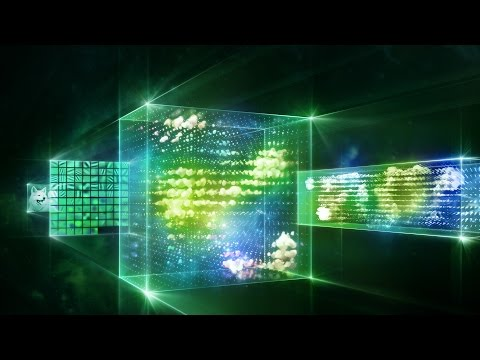

In [0]:
from IPython.display import YouTubeVideo
# NVIDIA: "The Deep Learning Revolution"
YouTubeVideo('Dy0hJWltsyE', width=904, height=258)

## What is Machine Learning and why do we use it?
We hope, you're sufficiently amped about AI after the video. While AI and ML are clearly cool, we still have motivate a little bit, why we actually need to use them. 

In practice, we are often interested in modelling different phenomenons such as the relationship between a sentence in German and in Mandarin, or an X-Ray image and a cancer diagnosis - you've just seen some more examples in the video. If we are lucky, there already exists a theoretical frameworks, say grammar books or physical models, which allow us to explain these relationships. If $\mathbf{x}$ and $\mathbf{y}$ are sentences in differnet languages, or $\mathbf{x}$ the X-ray image (hah!) and $\mathbf{y}$ the diagnosis (not the Y-ray image), we may already know the relation between  the input $\mathbf{x}$ and output $\mathbf{y}$. 
Unfortunately, for many real world problems we don't really know that relation.
However, we still might be able to observe pairs of measurements $(\mathbf{x},\mathbf{y})$, that can be used for "learning".
The main goal is to minimize the difference between the **ground truth** ($\mathbf{y}$) and the **prediction** ($\mathbf{\hat{y}}$).

There, that's Machine Learning in a nutshell.

## Use-case for Machine Learning: Activity Detection
For this exercise, we'll use an interesting real-world use-case example for Machine Learning: **activity detection**.

In the last years, fitness trackers and smart watches have grown a lot in popularity.
Their main usage is related to personal health - i.e. of monitoring heart rate and tracking daily activity.
These devices collect a large amount of different types of physiological data, and measurements will be vary across the different activity phases (standing, walking, sitting, falling,cramps and running). A person's heart rate is usually lower when you are sitting or lying down than when you are standing or exercising.

Machine Learning methods can be used to "learn" the relationships between physiological measurements and activity, what allows us to predict the most likely current activity of a person.
This also has practical application, as modern smart watches are able to predict falls of the wearer (think of an old person who is living alone and may require emergency medical assistance), and notify a third party.

The Activity Data [dataset](https://www.kaggle.com/pitasr/falldata) and [study](https://www.mdpi.com/1424-8220/14/6/10691) used in this assignment cover exactly this case.


## Exercise structure
The following exercise is structured according to the following tasks:

**Task 1:** Machine Learning Performance Metrics - Basics - 4 points
> 1.1 Loading Model Predictions  
> 1.2 Confusion Matrix Computation  
> 1.3 True/False Positive/Negative Calculation  
> 1.4 Performance Metrics Computation  

**Task 2:** Training vs. Test Performance - 1 points
> 2.1 Loading Model Predictions  
> 2.2 Computing Training and Test Performance 

**Task 3:** Machine Learning Performance Metrics - Advanced - 3 points
> 3.1 Loading Probabilistic Model predictions  
> 3.2 Performace Computation with Threshold  
> 3.3 ROC Curve Computation  
> 3.4 ROC Curve Plotting  

**Task 4:** Machine Learning Performance Metrics - Understanding (Multiple Choice) - 2 point


## Setup of the Assignment Libraries
As in the previous labs, we will make use of several python libraries that simplify data analysis and visualization. In this lab will use the [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [sklearn](https://scikit-learn.org/), [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) libraries. Let's import the libraries and get started:

In [0]:
# import the numpy and pandas data science library
import pandas as pd
import numpy as np

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn.metrics as backup
import sklearn.metrics as metrics

# set grading variable to False to test your code
grading = False

## Task 1: Machine Learning Performance Metrics - Basics

## Task 1.1: Loading Model Prediction Data
In the assignments of the previous weeks you learned how to load and investigate a variety of data sets. Our first dataset is the abovementioned "activity data". It contains predictions and true labels for *activities*. The numbers 0-5 correspond to "standing", "walking", "sitting", " falling","cramps" and "running".
Let's load the first data file of the assignment, named:

> - **"./task_1.csv"** 

into the notebook. Please note, that the file containes the following data columns:

> - **"y_pred"** - the class label predicted by the machine learning model
> - **"y_true"** - the true ("ground truth") class label to be learned by the model

Next, extract the data contained in column **"y_true"** from the loaded data. Convert the extract data to a *numpy.ndarray* and name the array containing the extracted data **"y_true"**. Afterwards, likewase extract the data contained in column **"y_pred"** as a *numpy.ndarray* and name the array **"y_pred"**.

In [0]:
### Task 1.1 ###

if not grading:
    ### Your code here ###
    df = pd.read_csv("task_1.csv")
    y_true = df['y_true'].to_numpy()
    y_pred = df['y_pred'].to_numpy()
    
    ### all done ###


<class 'numpy.ndarray'>


The result of your extract should look like this: `y_true = [3, 2, 2, ... , 4, 3]` and `y_pred = [2, 2, 4, ... , 4, 3]`.

## Task 1.2: Confusion Matrix Computation
As you have probably already noticed we are dealing with a classification problem. In machine learning and particular classification the quality of a machine learning model can be evaluated with a variety of distinct quality measures. In order go get an initial idea of how the model behaves we will start by counting and arranging predictions vs. true classes. We can arrange that information as a matrix: each row of the matrix represents the number of instances that the classifier **predicted** per class, while each column represents the instances of the true or **actual** class. This matrix is usually referred to as **confusion matrix** (or sometimes also **error-matrix**). The layout simplifies interpretation and allows us to see how often the model mis-predicts (**confuses**) a samples of a specific class with another class. 

The following illustration shows the structure of a $3 \times 3$ confusion matrix of a 3-class classification task, but confusion matrices can be also used for classification problems with more than three classes which will result in a $n \times n$ matrix, where $n$ denotes the number of ground-truth classes.

<img align="center" style="max-width: 600px; height: auto" src="./figures/confusionmatrix.png">

[Source](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)


Implement the function **"compute_confusion_matrix"** in the cell below. Carefully read the **docstring** to understand the arguments and returns, as well as what the function should do.

In [0]:
### Task 1.2.1 ###

def compute_confusion_matrix(y_t,y_p):
    """
    computes confusion matrix, 
    #MY NOTE: CONFUSION WHY IS THE HEATMAP ALREADY MENTIONED HERE!
    plots the confusion matrix as heatmap 
    and returns the confusion matrix
    :param y_t: np.array with true input class
    :param y_p: np.array with predicted input class
    :return: nxn np.array confusion matrix, where n is the number of classes
    Note! Use your own code to compute the confusion matrix, use numpy functions exclusively.
    """ 
    
    ### Your code here ###
    np.set_printoptions(suppress=True)

    classes = set(y_t)
    n = len(classes)
    confusion_matrix = np.zeros((n,n), dtype=np.int16)

    classes = list(classes)
    

    for i in range(0, len(y_t)):
      row = classes.index(y_t[i])
      col = classes.index(y_p[i])

      confusion_matrix[row, col] += 1

    # Is not a np.array.. BUT WOULD ALSO NOT MAKE SENSE TO CONVERT ND ARRAY TO ONE DIMENSIONAL ARRAY
    return np.array(confusion_matrix)

    ### all done ###    


In [0]:
## do not change this cell ##
if not grading:
    #let's test your function with the test data you've loaded above
    confmat = compute_confusion_matrix(y_true,y_pred)
    print(confmat)

[[3206   38  239  469  468  188]
 [   7  403   85    4    3    0]
 [  66   76 1928  345   73   14]
 [ 133   20  470 2546  372   47]
 [ 239   21  238  690 2069  237]
 [ 161   10   95  193  388  841]]


We managed to compute the confusion matrix values, but as you will likely agree the raw matrix is hard to interpret. To make analysis easier we will now map the numbers into a visual representation by applying a **heatmap** visualization technique (read more about it [here](https://en.wikipedia.org/wiki/Heat_map)). A heatmap encodes each matrix cell into a color range which allows us interpret the underlying data more easily and to quickly detect correlations between classes.

Please complete the **"plot_confusion_matrix"** function in the next cell.

Carefully read the docstring and follow the instructions we left for you there. You can visualize the test matrix in the cell below.

In [0]:
## Task 1.2.2 ###

def plot_confusion_matrix(cmat, labels):
    """
    plots confusion matrix as seaborn.heatmap()
    :param confmat: nxn np.array
    :param labels: list with the n class labels
    :return: None

    - use plt.figure() to create a new figure
    - choose figsize = (5,5)
    - use seaborn.heatmap() to plot the confusion matrix with the options: square=True, annot=True, cbar=False
    - feel free to use any colormap by setting the cmap parameter
    - use the "labels" as ticklabels with xticklabels=labels and yticklabels=labels
    Add axis labels indicate predicted and true label axis. 
    """
    
    ### Your code here ###
    fig = plt.figure(figsize=(5, 5))
    heat_map = sns.heatmap(cmat, xticklabels=labels, yticklabels=labels, cmap="PuBuGn", square=True, annot=True, cbar=False)
    
    plt.ylabel('Predicted Class')
    plt.xlabel('True Class')
    plt.show()
    ### all done ###
    
    return None


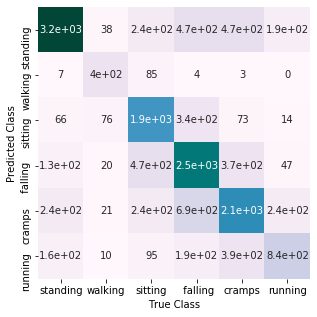

In [0]:
## do not change this cell ##
activity_labels = ["standing", "walking", "sitting", " falling","cramps","running"]

if not grading:
    #let's test your plotting function
    plot_confusion_matrix(confmat,activity_labels)

Take a look at the heatmap of the confusion matrix you have just visualized. It should look similar to this one here:

<img align="center" style="max-width: 600px; height: auto" src="./figures/confusionmatrix_falldata.png">

 At a glance, it's easy to see, which classes are missclassified or *confused* with another. Considering our example data set, this already gives us important information. As an example, we can see that *falling* is confused with *cramps*, which may not be such a problem. A patient would probably need attention either way. It is, however, also confused with *sitting*, in which case missclassification could be dangerous.

## Task 1.3: True/False Positive/Negative

While the confusion matrix provides us detailed information, we might want to condense the information even further. The more classes there are, the harder it becomes to get an overview just from looking at the confusion matrix. Fortunately, there are performance metrics for that, we'll slowly put them together in the next steps.

From the **confusion matrix**, it's a small step to evaluate the model predictions even further. Therefore, let's compute the **class-wise** true-positives, false-positives, true-negatives and false-negatives. Remember that the distinct classification measures are defined as follows:

> - a **true positive** is an outcome where the model **correctly** predicts the **positive class**,
> - a **false positive** is an outcome where the model **incorrectly** predicts the **positive class**,
> - a **true negative** is an outcome where the model **correctly** predicts the **negative class**,
> - a **false negative** is an outcome where the model **incorrectly** predicts the **negative class**.

To compute these values, complete the function in the cell below. Carefully read the docstring for instructions.

In [0]:
### Task 1.3 ###

def compute_tp_fp(cmat):
    """
    computes the class-wise tp,fp,tn and fn values.
    Background reading here: https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
    :param cmat: np.ndarray nxn confusion matrix. axis[0]: predicted, axis[1]: true
    :return: tp,fp,tn,fn np.array of size n containing the class wise values
    
    !note! use your own code to compute the values, rely on np functions exclusively.
    """
    
    ### your code here ###



    dim = cmat.shape

    tp = np.zeros(dim[0])
    fn = np.zeros(dim[0])
    tn = np.zeros(dim[0])
    fp = np.zeros(dim[0])


    for row in range(0, dim[0]):
      tp_class = cmat[row, row]
      fn_class = sum(cmat[row, :]) - tp_class
      fp_class = sum(cmat[:,row]) - tp_class
      tn_class = sum(sum(cmat)) - fn_class - tp_class - fp_class

      tp[row] = tp_class
      tn[row] = tn_class
      fp[row] = fp_class
      fn[row] = fn_class

      
      
    
    
    ### all done ###
    
    return tp, fp, tn, fn

In [0]:
## do not change this cell ##
if not grading:
    # let's test your tp_fp function
    true_pos, false_pos, true_neg, false_neg = compute_tp_fp(confmat)
    print(f"true-positives: {true_pos}")
    print(f"false-positives: {false_pos}")
    print(f"true-negatives: {true_neg}")
    print(f"false-negatives: {false_neg}")

true-positives: [3206.  403. 1928. 2546. 2069.  841.]
false-positives: [ 606.  165. 1127. 1701. 1304.  486.]
true-negatives: [11168. 15715. 12753. 11093. 11584. 14208.]
false-negatives: [1402.   99.  574. 1042. 1425.  847.]


Your outcome of the test-statement should look similar to the following: 

`true-positives: [3206.  403. 1928. 2546. 2069.  841.]; false-positives: [ 606.  165. 1127. 1701. 1304.  486.]; true-negatives: [11168. 15715. 12753. 11093. 11584. 14208.]; false-negatives: [1402.   99.  574. 1042. 1425.  847.]`.

## Task 1.4: Performance Metrics Computation
In the lecture you learned about a set of more advanced metrics to evaluate machine learning models, namely:

> - the **accuracy**, denotes the fraction of correct predictions out of all predictions;
> - the **precision**, denotes the ratio of correct prediction out of all predictions for one class;  
> - the **recall**, denotes the fraction of correctly classified samples out of all true samples of that class;
> - the **F1-measure**, denotes the harmonic mean of the precision and recall measure.

Having calculated the **class-wise** true/false positive/negative values in Exercise 1.3., it is very easy to compute **accuracy**, **precision**, **recall** and the **f1-score**. If you want to read up on multiclass performance metrics, check out this [post](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2).

Complete the function in the cell below, as always: carefully read the docstring!

In [0]:
### Task 1.4 ###

def compute_performance(cmat):
    """
    computes precision, accuracy, recall and F1-score
    :param cmat: np.ndarray nxn confusion matrix. axis[0]: predicted, axis[1]: trues
    :return: accuracy; scalar! 
    :return: precision; np.array of size n
    :return: recall; np.array of size n
    :return: F1; np.array of size n
    
    ! NOTE ! The accuracy is defined over all classes, while all other values are class-wise.
    
    For the accuracy: 
      There several ways of computing it. You can get it from cmat directly, or use the tp,tn,fp,fn values.
      You get the number of all predictions by just adding tp + tn + fp + fn and taking one entry of the array.
      To get all true predictions, sum the true-positiv predictions over all classes, e.g. with sum(tp) 
    
    For all other metrics: 
      Use the tp,tn,fp,fn values computed with your function.
      compute and return class-wise values
    
    """
    
    ### your code here ###
    tp, fp, tn, fn = compute_tp_fp(cmat)

    accuracy = sum(tp) / (tp[0] + tn[0] + fp[0] + fn[0])
    
    precision = np.zeros(len(tp))
    recall = np.zeros(len(tp))
    F1 = np.zeros(len(tp))

    for i in range(0, len(tp)):
      pass
      precision[i] = tp[i] / (tp[i] + fp[i])
      recall[i] = tp[i] / (tp[i] + fn[i])
      F1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
      
      
    
    ### all done ###
    
    return accuracy, precision, recall, F1

In [0]:
## do not change this cell ##

if not grading:
    #let's test your function
    acc, prec, rec, f1 = compute_performance(confmat)
    print(f"accuracy: {acc}")
    print(f"precision: {prec}")
    print(f"recall: {rec}")
    print(f"F1: {f1}")

accuracy: 0.6710413868880478
precision: [0.84102833 0.70950704 0.63109656 0.59948199 0.61340053 0.63376036]
recall: [0.69574653 0.80278884 0.77058353 0.70958751 0.59215799 0.49822275]
F1: [0.76152019 0.75327103 0.69389959 0.64990428 0.60259211 0.55787728]


Your output should be 
```
accuracy: 0.6710413868880478;  
precision: [0.84102833 0.70950704 0.63109656 0.59948199 0.61340053 0.63376036];   
recall: [0.69574653 0.80278884 0.77058353 0.70958751 0.59215799 0.49822275];   
F1: [0.76152019 0.75327103 0.69389959 0.64990428 0.60259211 0.55787728]
```

Let's visualize the data in a bar chart.

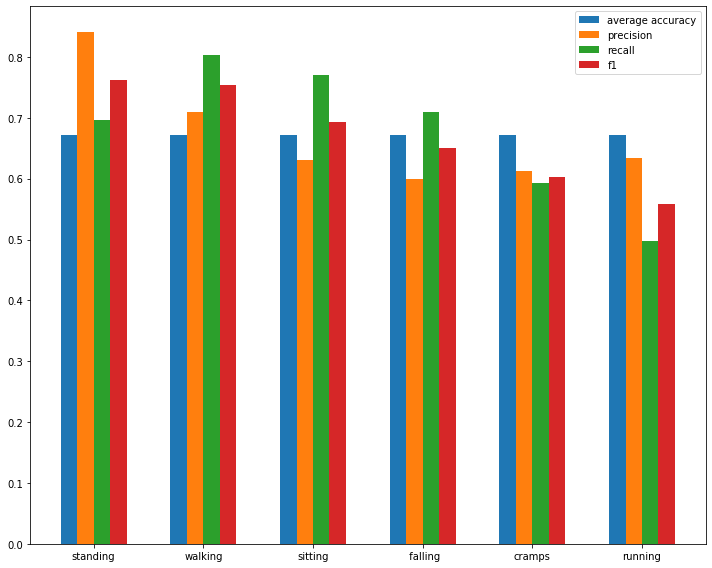

In [0]:
if not grading:
    
    plt.figure(figsize=(10, 8))

    ind = np.arange(6)
    width = 0.6

    plt.bar(ind-2*width/4,acc,width/4,align='edge', label = 'average accuracy')
    plt.bar(ind-width/4,prec,width/4,align='edge', label = 'precision')
    plt.bar(ind+0*width/4,rec,width/4,align = 'edge', label = 'recall')
    plt.bar(ind+1*width/4,f1,width/4,align = 'edge', label = 'f1')
    plt.legend()
    plt.xticks([0,1,2,3,4,5],activity_labels)
    plt.tight_layout()

As you can see, our accuracy over all classes isn't that bad. But the performance varies over classes and metrics. E.g., *standing* appears to be easier to classify than *running*. Also, while *running* has average precision, the recall is below 50%. Think about what that could mean.

## Task 2: Training vs. Test Performance (1 point)
In Machine Learning, the machine is *trained* to fit data. To determine how well the machine has learned the information in the data, we usually put aside a portion of the data. We then train the machine on the remaining data, the **training data**, and evaluate the general performance of the machine on the **test data**. The concept is similar to you learning about ML in this class. We *train* you on some questions, but the exam to *evaluate* you will definitely contain different questions so that we can see how well you've understood the general concept. :)

<img align="center" style="max-width: 600px; height: auto" src="./figures/trainevaldataset.png">


In this task, you will use the performance metrics with the functions you've defined above. However, you'll load separate **training** and **test** data and compute the **training performance** and **test performance**.

Start by loading the training data from ``` task_2_train.csv ``` and the test data from ``` test.csv ```. Store the output column-wise in np.arrays named `y_train_true`, `y_train_pred`, `y_test_true` and `y_test_pred`.



In [0]:
### Task 2.1 ###
if not grading:
    ### Your code here ###
    df = pd.read_csv("task_2_train.csv")
    y_train_true = df['y_train_true'].to_numpy()
    y_train_pred = df['y_train_pred'].to_numpy()
    df = pd.read_csv("task_2_test.csv")
    y_test_true = df['y_test_true'].to_numpy()
    y_test_pred = df['y_test_pred'].to_numpy()

    
    ### all done ###

Next, complete the function in the cell below to compute the performance metrics for both training and testuation data. As always, carefully read the docstring :)

In [0]:
### Task 2.2 ###

def compute_train_test_performance(y_tr_t,y_tr_p,y_te_t,y_te_p):
    """
    computes training and test performance measures
    :param y_tr_t: n dim np.array containing true training class
    :param y_tr_p: n dim np.array containing predicted training class
    :param y_te_t: m dim np.array containing true test class
    :param y_te_p: m dim np.array containing predicted test class
    :return: train_dict, test_dict
    train_dict is a dictionary containing precision, accuracy, recall, F1 on the training data.
    test_dict is a dictionary containing precision, accuracy, recall, F1 on the test data.

    use the functions above or - alternatively - sklearn metrics functions:
    https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation
    In that case, use average = 'micro'
    """
        
    ### your code here ###
    cmat = compute_confusion_matrix(y_tr_t, y_tr_p)
    accuracy_tr, precision_tr, recall_tr, F1_tr = compute_performance(cmat)
    train_dict = {'precision':precision_tr, 'accuracy': accuracy_tr, 'recall':recall_tr,'F1': F1_tr}
    
    

    cmat = compute_confusion_matrix(y_te_t, y_te_p)
    accuracy_te, precision_te, recall_te, F1_te = compute_performance(cmat)
    """
    accuracy_te = metrics.accuracy_score(y_te_t, y_te_p)
    precision_te = metrics.precision_score(y_te_t, y_te_p, average='micro')
    recall_te = metrics.recall_score(y_te_t,y_te_p, average='micro')
    F1_te = metrics.f1_score(y_te_t, y_te_p, average='micro')
    """
    test_dict = {'precision':precision_te, 'accuracy': accuracy_te, 'recall':recall_te,'F1': F1_te}

    
    
    ### all done ###
    
    return train_dict, test_dict
    

In [0]:
## do not change this cell
if not grading:
    # great, let's compare the metrics
    train_dict, test_dict = compute_train_test_performance(y_train_true,y_train_pred,y_test_true,y_test_pred)
    print(f"precision :::   train: {np.mean(train_dict['precision'])} - test: {np.mean(test_dict['precision'])}")
    print(f"accuracy :::   train: {np.mean(train_dict['accuracy'])} - test: {np.mean(test_dict['accuracy'])}")
    print(f"recall :::   train: {np.mean(train_dict['recall'])} - test: {np.mean(test_dict['recall'])}")
    print(f"F1 :::   train: {np.mean(train_dict['F1'])} - test: {np.mean(test_dict['F1'])}")

    #VERY IMPORTANT: IS PRECISION AND ACCURACY CONFUSED IN EXAMPLE? AND WTF SHOULD THE TEST VALUES BE?!?!??

precision :::   train: 0.8707079133801002 - test: 0.6555430430043828
accuracy :::   train: 0.9146245748670097 - test: 0.7151576805696847
recall :::   train: 0.9166966903726013 - test: 0.7166098336029898
F1 :::   train: 0.8880478279662279 - test: 0.6679752652271235


You can compare your output to the following:
! note ! *train* values are computed with our function, *test* values with sklearn.metrics



```
precision :::   train: 0.9146245748670097 - test: 0.7151576805696847
accuracy :::   train: 0.8707079133801002 - test: 0.7151576805696847
recall :::   train: 0.9166966903726013 - test: 0.7151576805696847
F1 :::   train: 0.8880478279662279 - test: 0.7151576805696847
```



## Taks 3: Machine Learning Performance Metrics - Advanced (3 Points)
A nice aspect of many ML methods is that they operate on probabilities. They don't output binary class predictions, but **probabilities** of a sample belonging to a class. Using the probabilities, we then have to determine a class as the prediction: sample `a` belongs to `class b`.

**Probability Tresholds**

For **binary classification**, we can use **thresholding** to switch between classes at a certain threshold value. An intuitive threshold is `0.5`, right in the middle between the two class values `[0,1]`; probabilities below `0.5` are then classified as `0`, everything above as class `1`. Often 0.5 is unfortunately not ideal and results in unaccaptable accuracy/precision/recall/F1 rates.

**ROC curves**

How could we find better threshold values? A straight-forward method is to just try different trehsholds and eveluate the performance. A more systematic approach is to compute the **ROC** curve. The ROC curve plots the **True-Positive-Rate** or **TPR** against the **False-Positive-Rate** or **FPR**. Each point on the curve is associated to one threshold value. 

<img align="center" style="max-width: 600px; height: auto" src="./figures/ROC_example.png">

[Source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

Depending on the use-case, one can pick a point on the ROC curve that is the ideal compromise between TPR and FPR. The ideal treshold can then be reverse-engineered from that point. *(Read up on ROC curves [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5))*

If we return to our example from before, let us assume we only want to classify between `0: all good` and `1: patient has fallen`, we can now use the ROC curve to determine where to separate the two classes. It ultimately faces us with the decision: do we want high TPR - not miss any `patient has fallen` case at the cost of many false alarms. Or do we prefer to miss some fallen patients to keep fals alarms at the minimum? The different performance values may help us take an informed decision, but it remains a design decision. 

**Area under the ROC curve**

Lastly, ROC curves also tell us something about the classifier itself. We won't go too much into detail, consider this: if the classifier can't really tell the two classes apart and the predictions are random, increasing the threshold will increase both true positives and false positives at the same rate. The baseline is therefore a straight line from `(0,0)` to `(1,1)`. The further the ROC curve bends away from that straight line towards the top left, the better the classifier separates the two classes. One quality criterion to evaluate a classifier is tehrefore to compute the **Area under the curve**, or **ROC AUC**. The larger that value is, the better.

*Note! The ROC can actually bend towards the bottom right, if the classifier performs worse than a random classifier by predicting more wrong thant right. That should obviously never happen...*

In the next task, you will use predicted probabilities, compute the predictions with different trehshold and eventually compute a ROC curve.

## Task 3.1: Data Loading
To start with, you have to get the probability prediction dataset. Load the file `task_3.csv` as a pandas.DataFrame and extract the columns **y_prob_pred** and **y_true** as np.arrays with the same names. Note: **y_prob_pred** has only one column, so the one prediction probablitiy spans [0,1], where 0 indicates class 1 and 1 indicates class 2. Convert the data to type *numpy.ndarray*.

In [0]:
### Task 3.1 ###
if not grading:
    
    ### Your code here ###

    df = pd.read_csv("task_3.csv")
    y_prob_pred = np.asarray(df['y_prob_pred'].to_numpy())
    y_true = np.asarray(df['y_true'].to_numpy())
    
    
    
    ### all done ###

## Task 3.2: Performaces Computation with Threshold
To compute the ROC curve, we need a function that computes predictions for a specific trehshold. 
Complete that function in the following cell!

In [0]:
### Task 3.2 ###

def compute_performance_w_treshold(y_pr,y_t,th):
    """
    computes the performance values for a given threshold
    :param y_pr: np.array of size n with probability values between 0 and 1
    :param y_t: np.array of size n with true classes, either 0 or 1
    :param th: classification threshold for probability. Probaility below threshold -> class 0, above threshold -> class 1
    :return: tp, fp, tn, fn np.arrays of size n

    # Hint. Remember list comprehension ;) Alternatively, use a loop over the prediction.
    # Hint2: use the functions you've defined above to compute the performance. 
    # If that didn't work, you may use sklearn.metrics.confusion_matrix() to compute the binary tp, fp, fn, tp
    # reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    """
    
    ### your code here ###

    prediction = [0 if x < th else 1 for x in y_pr]


    #IMPORTANT: STRANGE OUTPUT
    """print( y_pr)
    print("-----\n")
    print( prediction)
    print("-----\n")
    print( y_t)
    print("-----\n")"""

    cmat = compute_confusion_matrix(y_t,prediction)
    tp, fp, tn, fn = compute_tp_fp(cmat)
    
    
    ### all done ###
    
    return tp, fp, tn, fn

## Task 3.3: ROC Curve Computation
Use the previous function to compute the ROC curve in the following cell.
Compute `n_points` data pairs of `TPR` vs. `FPR`. The two are defined as: 
> - **TPR** = tp / (tp + fn)
> - **FPR** = fp / (fp + tn)

Read the docstring carefully!


In [0]:
### Task 3.3 ###

def compute_ROC_curve(y_pr,y_t,n_points):
    """
    Computes dots on the ROC curve.
    :param y_pr: np.array of size n with probability values between 0 and 1
    :param y_t: np.array of size n with true classes, either 0 or 1
    :param n_points: integer number of data points, one each for a threshold value.
    :return: tpr np.array of size points with the true-positive-rate (TP / (TP + FN))
    :return: fpr np.array of size points with the false-positive-rate (FP / (FP + TN))
    :return: ths np.array of size points with the threshold values

    The threshold data points should be linearly spaced on the range [0,1] 
    with "n_points" as the number of data points, including 0 and 1.

    # hint: your tp, fp tn, fn values are probably still class wise, so you still have two. 
    for binary cases, we usually take tp[1], so the second one. 
    The second values belong to the class "1" or "true" 
    """
    
    ### your code here ###
    tpr = np.zeros(n_points)
    fpr = np.zeros(n_points)
    ths = np.zeros(n_points)

    for p in range(0, n_points):
      th = 1/(n_points - 1)*p
      # is that one point too much ??? IMPORTANT:
      
      tp, fp, tn, fn = compute_performance_w_treshold(y_pr,y_t,th)
      tpr_class = tp[1] / (tp[1] + fn[1])
      fpr_class = fp[1] / (fp[1] + tn[1])
      tpr[p] = tpr_class
      fpr[p] = fpr_class
      ths[p] = th
    
    # IMPORTANT WRONG VALUES
    
    ### all done
    
    return tpr, fpr, ths
    

In [0]:
## don't change this cell
if not grading:
    # let's test your ROC related functions!
    trpr, fapr, thres = compute_ROC_curve(y_prob_pred,y_true,100)
    print(f"TPR={trpr[85:90]}; FPR={fapr[85:90]};")

TPR=[0.94 0.94 0.94 0.94 0.92]; FPR=[0.06 0.06 0.05 0.03 0.02];


The output should look like this:

`TPR=[1. 1. 1. 1. 1.]; FPR=[1.   0.27 0.27 0.27 0.25];`

## Task 3.4: ROC Curve Plotting
Awesome, so now we need to plot the curve to make any use of it. You know how to plot stuff by now, so that should be a piece of cake. Complete the following function!

In [0]:
### Task 3.4 ###

def plot_ROC_curve(tpr,fpr):
    """
    plots the tpr on y-axis against fpr on x-axis -> called ROC curve. 
    :param tpr: np.array of size n with true positive rate
    :param fpr: np.array os size n with false positive rate
    :return: None
    
    use figsize=(7,7)
    label the axis with "TPR" and "FPR"
    
    """

    fig = plt.figure(figsize = (7,7))
    

    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC CURVE')
    plt.plot(fpr, tpr)
    plt.show()

    ### your code here ###

    #IMPORTANT FILL OUT
    
    ### all done ###
    
    return None

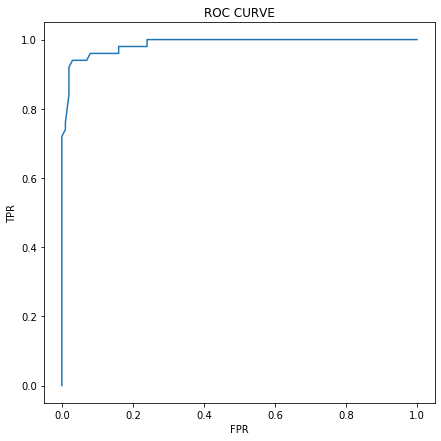

In [0]:
if not grading:
    plot_ROC_curve(trpr,fapr)

## Task 4: Machine Learning Performance Metrics - Understanding (2 points)
Great, you got through all the coding. Now, let's end with some multiple choice questions on performance metrics, ROC curves and how to use them.

**Question 1**: ROC curves can be used to find the ideal threshold value. Looking at the curve above, what is the ideal threshold value and why?
> 1. threshold somewhere in the middle, so that we pick the point on the edge of ROC-curve. That's the ideal tradeoff between TPR and FPR => answer_1 = 1
> 2. depends on the use case. If I want low FPR, low threshold, if I want high TPR, high threshold => answer_1 = 2
> 3. depends on the use case. If I want low FPR, high threshold, if I want high TPR, low threshold => answer_1 = 3
> 4. threshold can't be determined with the ROC curve at all, because it doesn't represent the F1 score appropriately => answer_1 = 4

In [0]:
## set your answer_1 in this cell
# set answer as one of [1,2,3,4]

answer_1 = 3 #Oder sonst 1 ; What is the edge of the Curve

**Question 2**: If you've read something about ROC curves, you now know that a goal is to maximize the area under the curve (AUC).  *If that's new, read up [here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)*. That's because the higher the AUC, the better the classifier  separates the two classes. What's the best threshold to maximize the area under the ROC curve?
> 1. Pick the point on the edge of ROC-curve. That's the maximum orthogonal distance to the diagonal (0,0) to (1,1) line. => answer_2 = 1
> 2. The question is wrong. The shape of the ROC curve depends on the classifier, not on the threshold. => answer_2 = 2
> 3. Depends on the use case. If I want low FPR, I maximize the AUC on the left side (AUC_left), if I want high TPR I maximize the area under the right side (AUC_right) => answer_2 = 3
> 4. The area under the ROC curve is no indicator for the classifier performance, because it  only depends on the threhold values, not on the probability prediction => answer_2 = 4

In [0]:
## set your answer_2 in this cell
# set answer as one of #[1,2,3,4]


answer_2 = 2

**Question 3**: Getting back to the performance values, we have computed precision, recall and F1. For some datasets, the performance values were similar. In other cases, precision, recall and F1 had very different values. Why is that? 
> 1. it depends on the distribution of tp/fp/tn/fn. If there are only very few false predictions, or equally many false positve and false negative predictions, then the confusion matrix is almost symmetric and precision and recall are very similar. => answer_3 = 1
> 2. it depends on the class. Cats generally have a higher recall, dogs a better precision. => answer_3 = 2
> 3. the performance values are actually designed for regression. They can be used on classification, but have a destinct disadvantage on test datasets. => answer_3 = 3
> 4. performance can't be measured properly, we always need an test set for that. => answer_3 = 4

In [0]:
## set your answer_3 in this cell
# set answer as one of #[1,2,3,4]
answer_3 = 1

**Question 4**: Lastly, we have also looked at training and test sets and a classifier's performance on them. Why are the performance metrics different between train and test set? 
> 1. The classifier learns the training set, so the performance is always better there than on the test set. => answer_4 = 1
> 2. Training and test set are drawn from the same distribution, so the classifier's performance is always identical on both sets.  => answer_4 = 2
> 3. The test set is usually smaller than the training set, so the classifier makes fewer errors and thus has also a better performance on the evaluation set compared to the training set.  => answer_4 = 3
> 4. As the set splitting is random, the training and test performance can theoretically be anything. The training performance is usually better than the test performance, as that's the data the machine "learns". => answer_4 = 4

In [0]:
## set your answer_4 in this cell
    # set answer as one of #[1,2,3,4]
answer_4 = 4 #Actually, 1 would not be true if trainig set equals to test set